# Dynamics HW

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
%run ~/.jupyter/config.ipy

# Earth-Sun with Euler method

We have 4 equations (because motion is in a plane):

$$
\dot{r_{i}} = v_{i}
$$
$$
\dot{v_{i}} = - \Sigma \frac{G m_{j}}{r_{ij}^{3}} (r_{i} - r_{j})
$$

In [121]:
class integrator():
    obj_dtype = [("mass", np.float64), 
                 ("x", np.float64), ("y", np.float64), 
                 ("vx", np.float64), ("vy", np.float64)]
    G = 1 # We use the same units as rebound - G = 1, distance in AU, mass in Msun, time in yr/(2*pi)
    
    def __init__(self):
        self.objs = np.zeros(0, dtype=self.obj_dtype)
    
    def add_obj(self, initial_params):
        self.objs = np.append(self.objs, np.array(initial_params, dtype=self.obj_dtype))
        
    def euler_integrate(self, total_dt, step_dt):
        print("Starting from {}".format(self.objs))
        steps = int(total_dt / step_dt)
        results = np.zeros((len(self.objs), steps + 1), dtype=self.obj_dtype)

        results[:,0] = self.objs
        for i in range(steps):
            accs = self._get_acc(results[:,i])
            results[:,i+1] = results[:,i]
            for j in range(len(results)):
                results[j,i+1]["x"] += results[j,i+1]["vx"] * step_dt
                results[j,i+1]["y"] += results[j,i+1]["vy"] * step_dt
                
                results[j,i+1]["vx"] += accs[j]["x"] * step_dt
                results[j,i+1]["vy"] += accs[j]["y"] * step_dt
            
        return results 
        
        
    def _get_acc(self, objs):
        accs = np.zeros(len(objs), dtype=[("x", np.float64), ("y", np.float64)])
        for i in range(len(objs)):
            dx = objs["x"] - objs[i]["x"]
            dy = objs["y"] - objs[i]["y"]
            dists = np.sqrt(np.power(dx, 2) + np.power(dy, 2))
            acc = self.G * objs["mass"] / dists**3
            blah = np.nansum(acc * (dx, dy), axis=1)
            accs[i]["x"] = blah[0]
            accs[i]["y"] = blah[1]
        return accs

In [124]:
sim = integrator()
sim.add_obj((1, 0, 0, 0, 0))
sim.add_obj((1e-3, 1, 0, 0, 1))

results = sim.euler_integrate(2*np.pi, 0.001)

Starting from [(1.   , 0., 0., 0., 0.) (0.001, 1., 0., 0., 1.)]


/home/christopher/.virtualenvs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/home/christopher/.virtualenvs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply


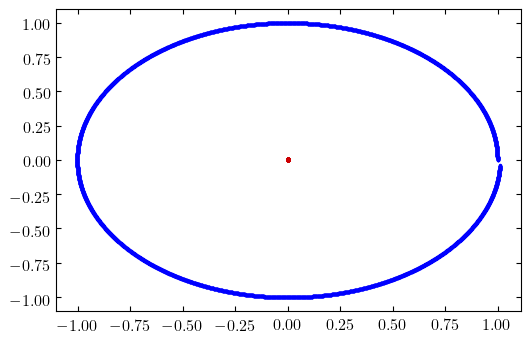

In [125]:
_, ax = plt.subplots()
for i in range(len(results)):
    ax.plot(results[i]["x"], results[i]["y"], marker=".")